In [1]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5('neuron_10k_v3_filtered_feature_bc_matrix.h5')
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
adata

AnnData object with n_obs × n_vars = 11843 × 31053
    var: 'gene_ids', 'feature_types', 'genome'

## Step 1: Filtering

Produce a PCA plot before and after filtering.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'feature_types' as categorical
... storing 'genome' as categorical


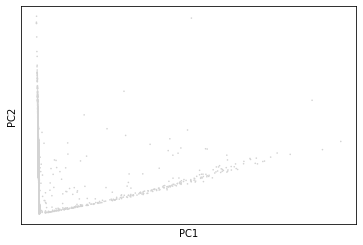

In [3]:
# Perform PCA
sc.tl.pca(adata)
# Plot PCA
sc.pl.pca(adata)

In [4]:
# Filter using Zheng approach
sc.pp.recipe_zheng17(adata)

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


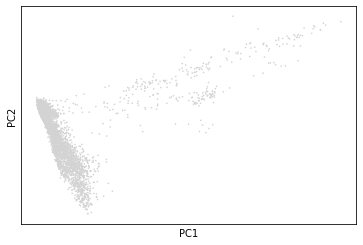

In [5]:
# Perform PCA
sc.tl.pca(adata)
# Plot PCA
sc.pl.pca(adata)

## Step 2: Clustering

Use leiden to identify clusters in the data. Produce t-SNE and UMAP plots showing the clusters.

In [6]:
sc.pp.neighbors(adata)

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


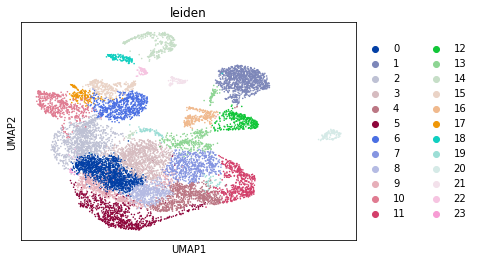

In [7]:
# Use leiden for clustering
sc.tl.leiden(adata)
# UMAP showing clusters
sc.tl.umap(adata)
sc.pl.umap(adata, color='leiden')

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


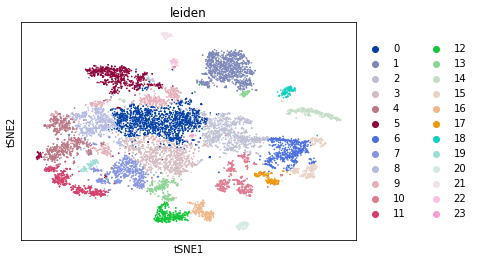

In [8]:
# Produce t-SNE plot
sc.tl.tsne(adata)
sc.pl.tsne(adata, color='leiden')

## Step 3: Distinguishing genes

Identify and plot genes that distinguish each cluster. Use both the t-test and logistic regression approaches, implemented through the rank_genes_groups function.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


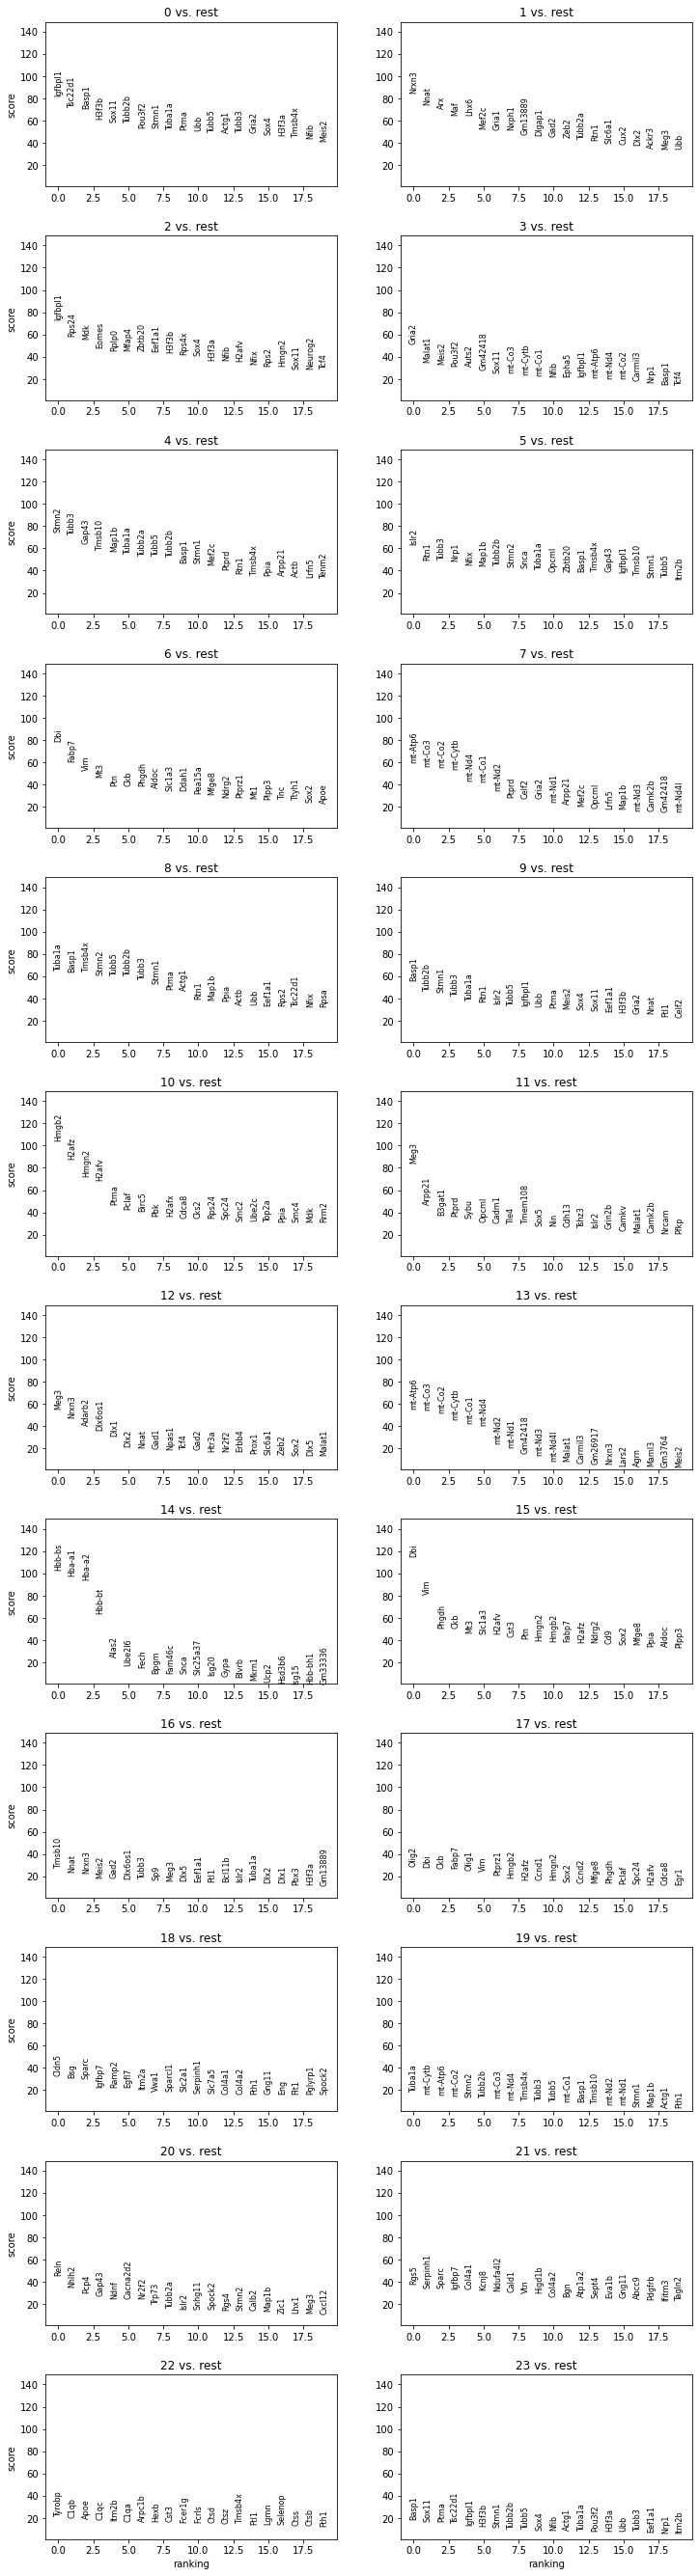

In [9]:
# Using t-test
sc.tl.rank_genes_groups(adata, groupby='leiden', method='t-test')
sc.pl.rank_genes_groups(adata, groupby='leiden', ncols=2)

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


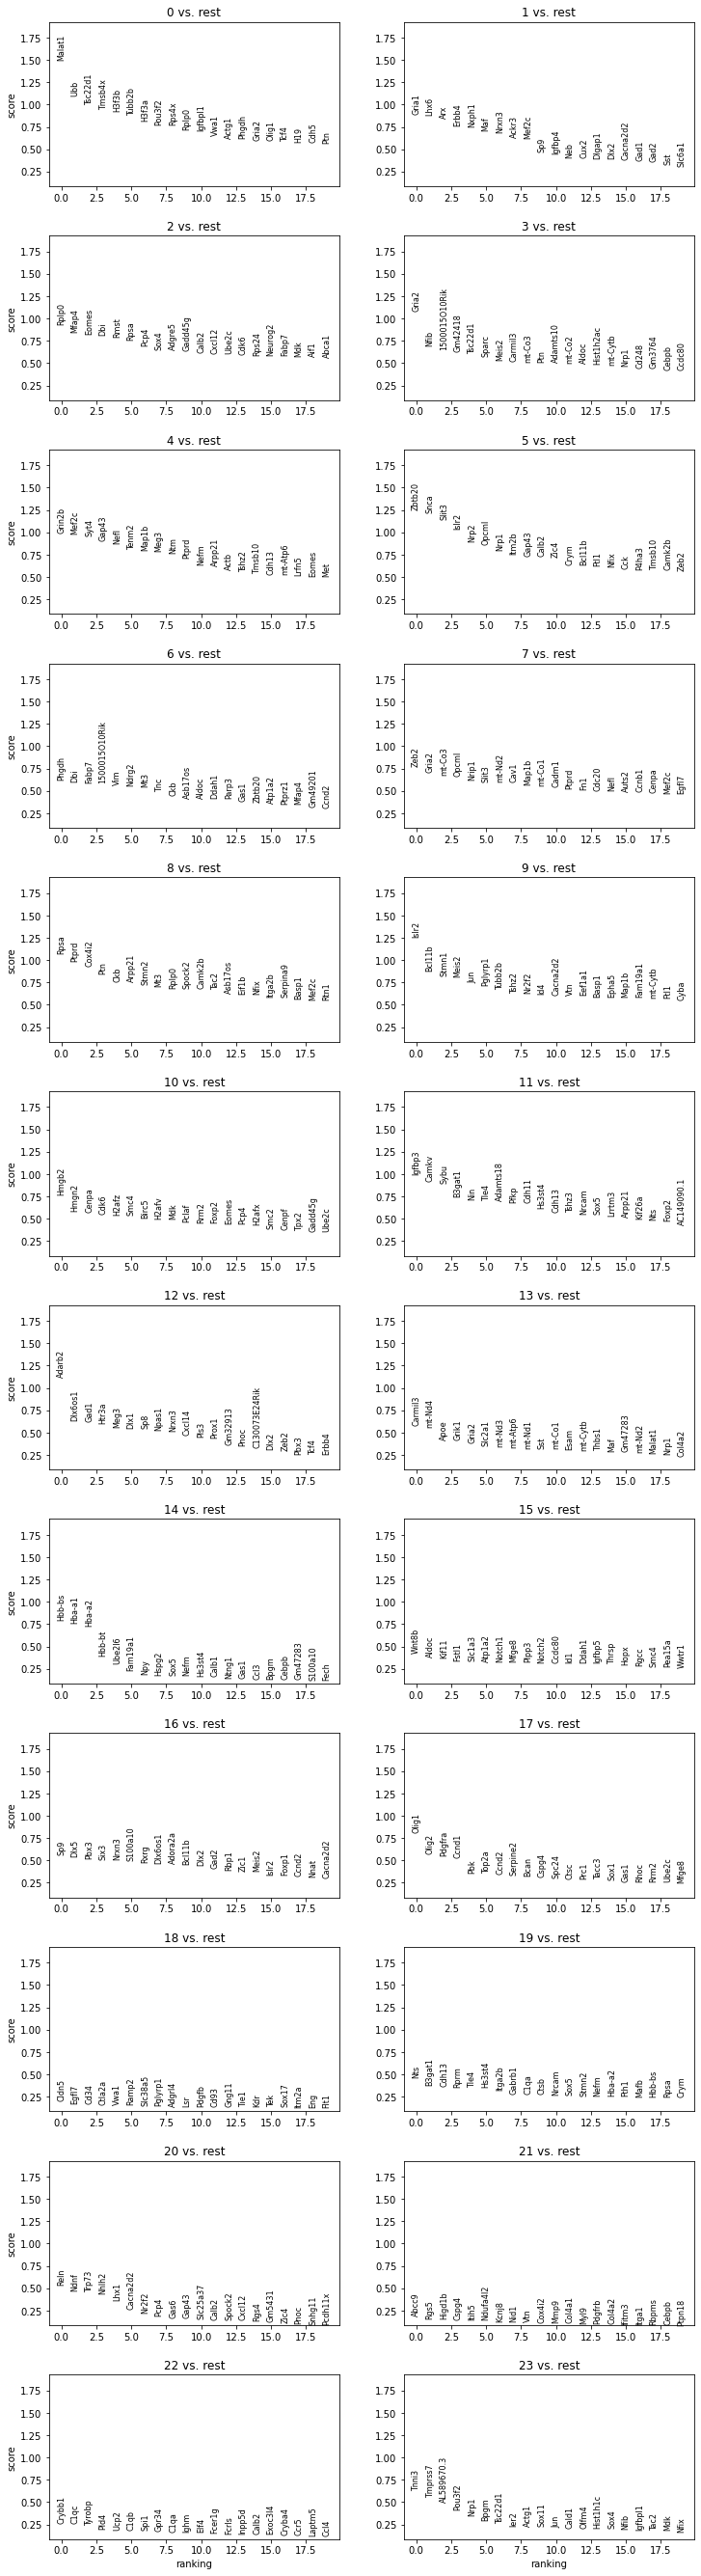

In [10]:
# Using logistic approach
sc.tl.rank_genes_groups(adata, groupby='leiden', method='logreg')
sc.pl.rank_genes_groups(adata, groupby='leiden', ncols=2)

## Step 4: Cell types

Identify some marker genes that should distinguish different brain cell types. Identify at least 8 cell types. 
1. You can color UMAP and t-SNE plots by any gene of your choice, which is helpful for visualizing which clusters are enriched for which genes, and which clusters might correspond to a specific brain cell type.
1. Alternatively, you can also produce dotplots and clustermaps that allow you to see how a specific set of genes are associated with your clusters. Also, stacked violin plots, etc. 

Besides these support plots, make an overall t-SNE or UMAP plot that labels your clusters with the cell types you think they most likely represent. Make sure to provide the support plots you made in order to establish your labeling.

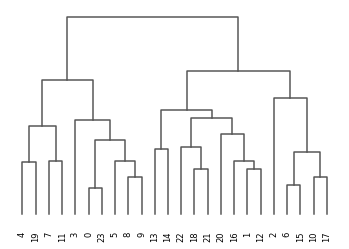

<AxesSubplot:>

In [42]:
# Dendrogram to determine relationship between clusters
sc.tl.dendrogram(adata, groupby="leiden")
sc.pl.dendrogram(adata, groupby="leiden")

This shows the relationship between groups and will help with identifying cell types.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


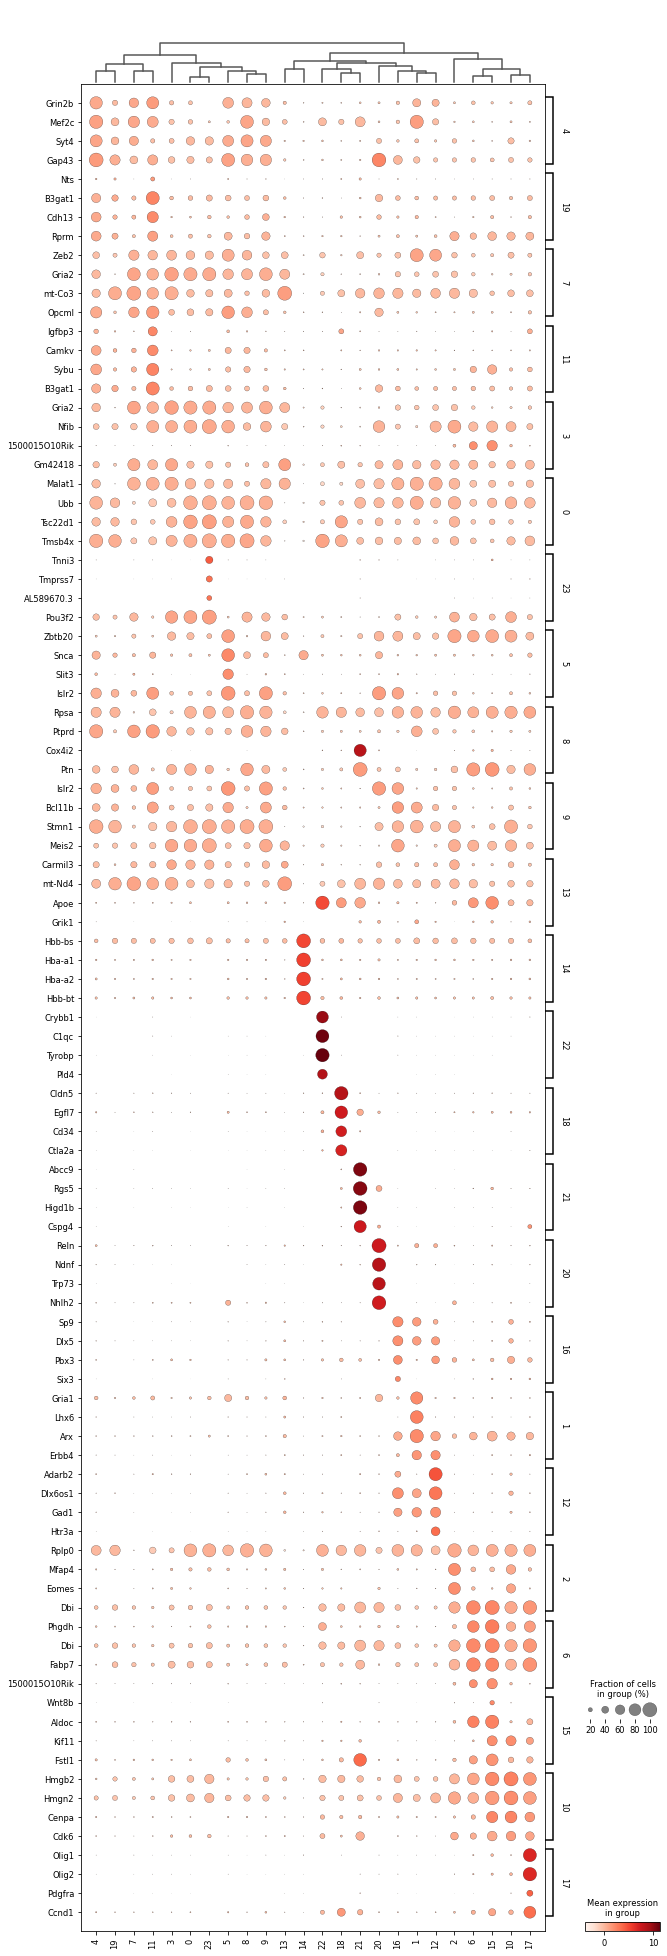

In [12]:
# Visualize marker genes with dotplot
sc.pl.rank_genes_groups_dotplot(adata, n_genes=4,groupby='leiden',swap_axes=True)

From this dotplot, I looked up the most prominent groups of genes (n = 4) and entered them in panglaodb.se, which uses scRNA-seq datasets to find cell types where a certain set of gene(s) are expressed. From this, I was able to classify the following markers into cell types (see below).

In [14]:
marker_genes_dict = {'Microglia':['Crybb1', 'C1qc', 'Tyrobp', 'Pld4'],
                    'Endothelial cells':['Cldn5', 'Egfl7', 'Cd34', 'Ctla2a'],
                    'Retinal ganglion cells':['Reln', 'Ndnf', 'Trp73', 'Nhlh2'],
                    'Oligodendrocytes':['Olig1', 'Olig2', 'Ccnd1'],
                    'Neurons': ['Igfbp3', 'Camkv', 'Sybu', 'B3gat1',
                               'Adarb2', 'Gad1', 'Dlx6os1', 'Htr3a']}

Now I used the dictionary to validate which groups are which cell types.

categories: 0, 1, 2, etc.
var_group_labels: Microglia, Endothelial cells, Retinal ganglion cells, etc.


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


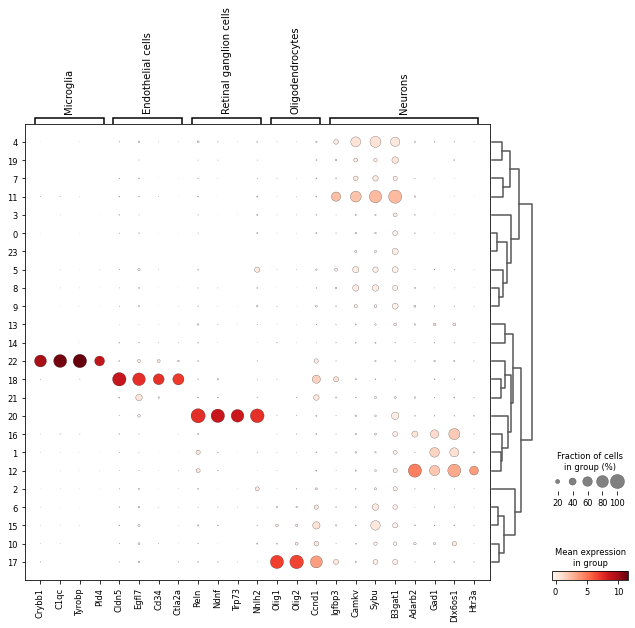

In [49]:
sc.pl.dotplot(adata, marker_genes_dict, 'leiden', dendrogram=True)

Based on the marker genes dot plot: 
- Group 22 is microglia 
- Group 18 is endothelial cells
- Group 20 is retinal ganglion cells
- Group 17 is oligodendrocytes 
- Groups 12 and 11 may be broadly classified as neurons

Now, I looked up marker genes from the literature and found sources that identified marker genes from mouse neurons. Below is the dictionary of cell markers.

In [15]:
marker_genes_dict2 = {'Neuroepithelial': ['Sox2','Notch1'],
                     'Radial glia': ['Vim','Pax6','Hes5','Tnc','Sox2'],
                     'Intermediate progenitors': ['Ascl1'],
                     'Immature neurons':['Tubb3','Stmn1'],
                     'Oligodendrocyte precursors': ['Pdgfra'],
                     'Oligodendrocytes': ['Olig1','Olig2','Ccnd1'],
                     'Schwann cells': ['Gap43', 'S100a6', 'S100a8', 
                                       'S100a9', 'S100a10', 'S100a11'],
                     'Astrocytes': ['Aldh1l1'],
                     'Microglia': ['Cd68','Aif1', 'Crybb1','C1qc','Tyrobp','Pld4'],
                     'Mature neurons': ['Nefm'],
                     'GABAergic neurons': ['Slc6a1','Gad2','Gad1'],
                     'Serotonergic neurons': ['Slc6a4'],
                     'Retinal ganglion cells':['Reln','Ndnf','Trp73','Nhlh2']}

categories: 0, 1, 2, etc.
var_group_labels: Neuroepithelial, Radial glia, Intermediate progenitors, etc.


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


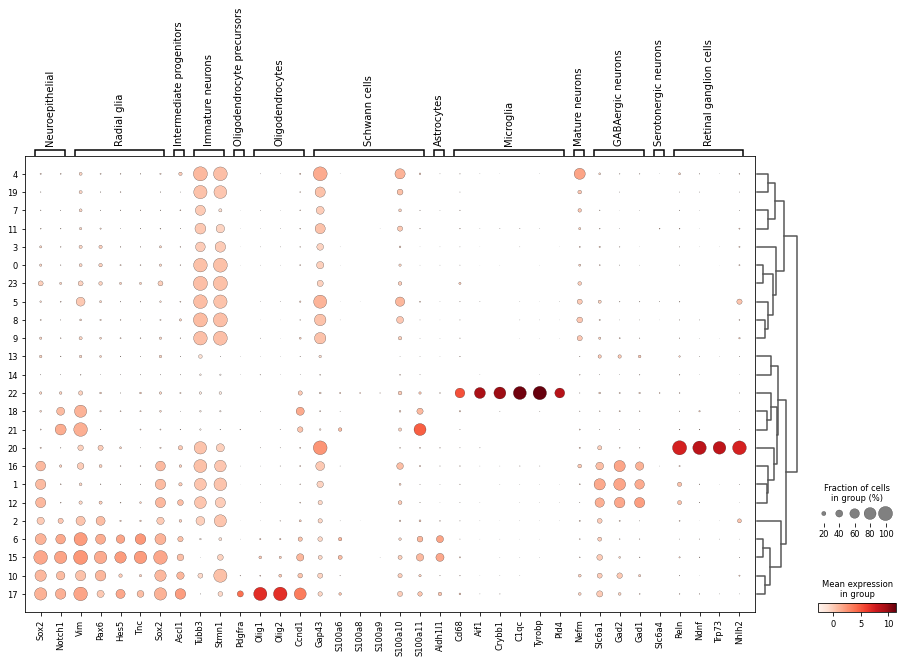

In [50]:
# Plot other marker genes 
sc.pl.dotplot(adata, marker_genes_dict2, 'leiden', dendrogram=True)

This validates that: 
- Group 17 is oligodendrocytes
- Group 22 is microglia
- Group 20 is retinal ganglion cells 

To identify more cell types, I looked up cell types from another literature source below:

In [16]:
marker_genes = {'Astrocytes': ['Aldh1l1','Gja1','Aldoc'],
               'Microglia':['Cx3cr1','Aif1','C1qc','Ccr5',
                           'Csf1r','Ctss'],
               'Meningeal cell':['Col1a2'],
               'Neuroblast':['Ccnd2','Dlx1','Notch1'],
               'Olfactory sensory neuron':['Gap43'],
               'Spiral ganglion neuron':['B3gat1','Calb1','Calb2'],
               'Oligodendrocyte':['Olig1','Olig2'],
               'Pericyte':['Pdgfrb','Rgs5'],
               'Progenitor cell':['Pdgfra','Nxph1','Vcan'],
               'Stem cell':['Sox2'],
               'Bergmann glia':['Fabp7','Nrxn3']}

categories: 0, 1, 2, etc.
var_group_labels: Astrocytes, Microglia, Meningeal cell, etc.


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


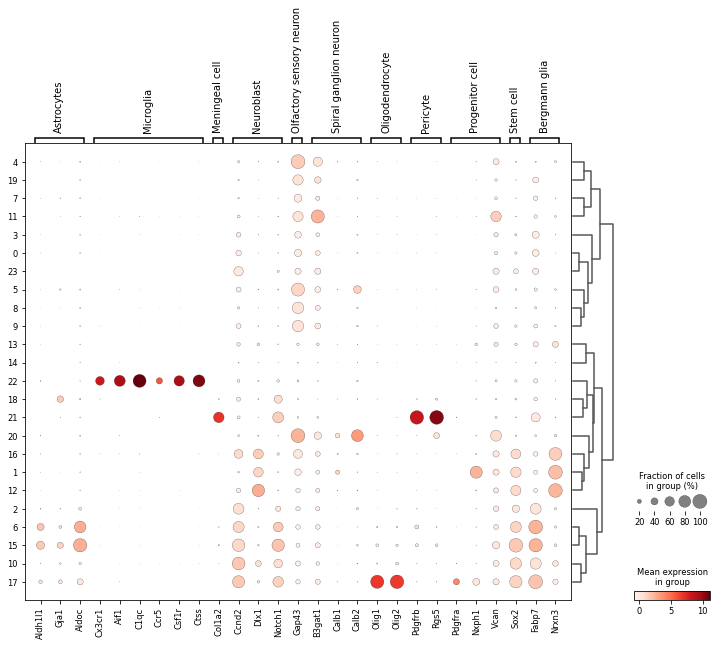

In [51]:
sc.pl.dotplot(adata, marker_genes, 'leiden', dendrogram=True)

This identifies: 
- Group 21 as pericytes or meningeal cells 

The next marker genes were found using another literature source: 

In [17]:
mg_dic = {'Astrocytes':['Gja1','Aldoc'],
         'Bergmann glia':['Fabp7','Nrxn3'],
         'Cajal-Retzius cells':['Lhx1','Pnoc'],
         'Cholinergic neurons':['Tac1'],
         'Choroid plexus cells':['Aqp1'],
         'Ependymal cells':['Stoml3','Pltp'],
         'GABAergic neurons': ['Slc6a1','Gad2','Gad1'],
         'Glutaminergic neurons':['Meis2'],
         'Immature neurons':['Notch1','Lhx6','Ascl1'],
         'Interneurons':['Calb1','Cck','Gad1','Isl1'],
         'Meningeal cells':['Nnat','Pdgfra','Lum','Vtn'],
         'Microglia':['Cx3cr1','Aif1','C1qc','Ccr5',
                           'Csf1r','Ctss'],
         'Neural stem/precursor cells':['Sp9','Sox1','Arx'],
         'Neuroblasts':['Grm5','Dlx2','Tacc3'],
         'Neuroendocrine cells':['Sst','Cck','Npy'],
         'Neurons':['Tubb3','Calb1','Calb2']}

categories: 0, 1, 2, etc.
var_group_labels: Astrocytes, Bergmann glia, Cajal-Retzius cells, etc.


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


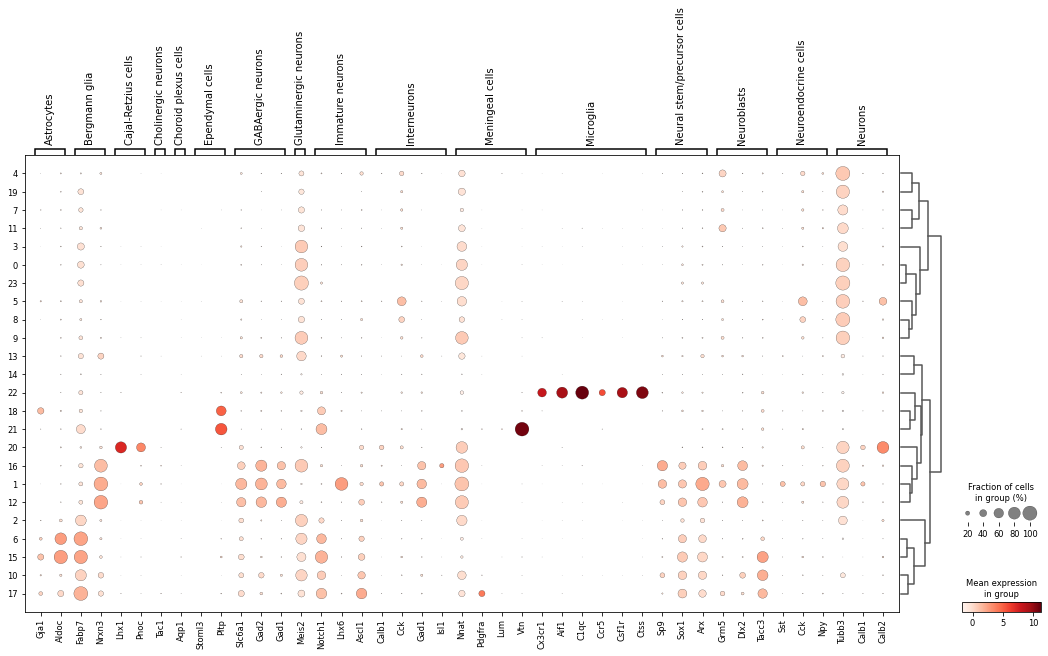

In [18]:
sc.pl.dotplot(adata, mg_dic, 'leiden',dendrogram=True)

- Group 20 is Cajal-Retzius cells (before they were identified as retinal ganglion cells)
- Again, group 21 as possible meningeal cells 
- Broadly, groups 16, 1, 12 as Bergmann glia
- Broadly, groups 6, 15, 10, and 17 as astrocytes
    - Mostly 6 and 15 from this data
- Groups 4, 19, 7, 11, 3, 0, 23, 5, 8, 9 as a neuron 
- Groups 18 and 21 as ependymal cells

The next source used was GeneAnalytics, which groups a list of genes into cells and tissues.

In [24]:
genecards_dict = {'Mature endothelial cells':['Pecam1','Spock2','Apln','Apod',
                                             'Bcan','Bcl11b','Ccnb1','Cdh11','Cenpa',
                                             'Clec1b', 'Dlx2','Dusp2', 'Exoc3l4', 'Fabp7','Gad2',
                                             'Gchfr','Gp6','Grm5','H19','Hba-x','Hbb-bh1','Hbb-y',
                                             'Hes5','Htra3','Ildr2','Isl1','Itm2a','Lsr','Ly75',
                                             'Mfsd2a','Mlc1','Pax6','Ptn','Ptprz1','Raet1d','Rgs4',
                                             'Rpsa','Slc1a3','Slc2a1','Slc3a2','Slc6a1','Slc7a1',
                                             'Slc7a5','Slco1c1','Sox11','Treml1','Ttyh1','Vwa1','Zic1'],
                 'Ganglionic eminence progenitor cells':['Dlx1','Dlx2','Isl1','Nr2f1', 'Ascl1',
                                                        'Olig2','Pax6'],
                 'Dopaminergic neurons':['Nr4a2','Tubb3','Anxa1','Atp1a2','Fgfr3','Gad1','Gja1','Grin2c',
                                        'Nefm','Ntm','Ptprz1','Slc6a1','Spp1','Wnt8b'],
                 'Choroid plexus progenitor cells':['Aqp1','Ccna2','Ccnb2','Cenpe','Fabp7',
                                                   'Fgfr3','Gypa','H19','Hbb-y','Igfbpl1',
                                                   'Kif11','Mki67','Nusap1','Pbk','Pclaf',
                                                   'Prc1','Slc2a1','Spc25','Top2a','Tpx2',
                                                   'Trp73','Wnt8b','Zic1'],
                 'Radial glia cells':['Pax6','Slc1a3','Vim','Erbb4','Fabp7','Fgfr3','Olig2','Tnc'],
                 'Angioblasts':['Flt1','Kdr','Tek','Pdgfb','Slc2a1'],
                 'GABA neurons':['Gad1','Gad2','Meis2','Tubb3'],
                 'Astrocytes':['Aldoc','Atp1a2','Bcan','Ccdc80','Cd9','Fgfbp3','Gdpd2',
                              'Gja1','Hes5','Itih3','Lrp4','Mlc1','Olig1','Olig2',
                              'Phgdh','Pla2g7','Plpp3','Ptprz1','Slc1a3',
                              'Tnc'],
                 'Meningeal cells':['Cxcl12','Zic1','Gja1','Tgfbr2'],
                 'Adult neural stem cells':['Sox1','Sox2','Fabp7','Slc1a3',
                                           'Tnc','Vim'],
                 'Pericytes':['Adm','Pdgfrb','Vcan']}

categories: 0, 1, 2, etc.
var_group_labels: Mature endothelial cells, Ganglionic eminence progenitor cells, Dopaminergic neurons, etc.


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


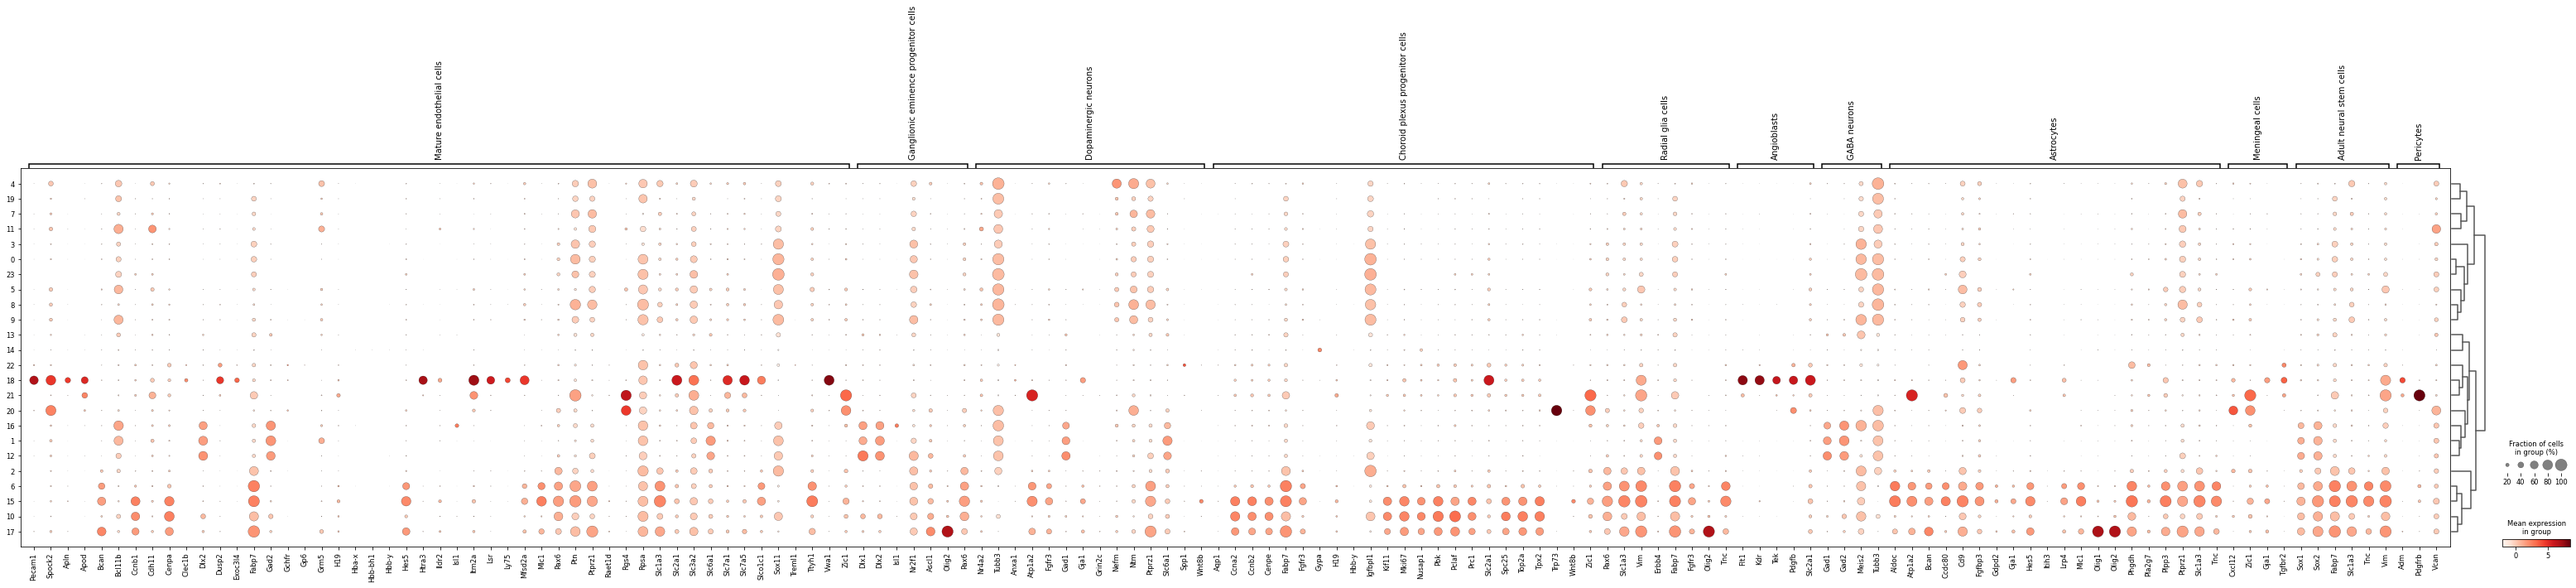

In [40]:
sc.pl.dotplot(adata, genecards_dict, 'leiden', dendrogram=True)

- Group 18 fall under endothelial cells and angioblasts. 
- Groups 6, 15, 10, 17 fall under radial glia cells.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


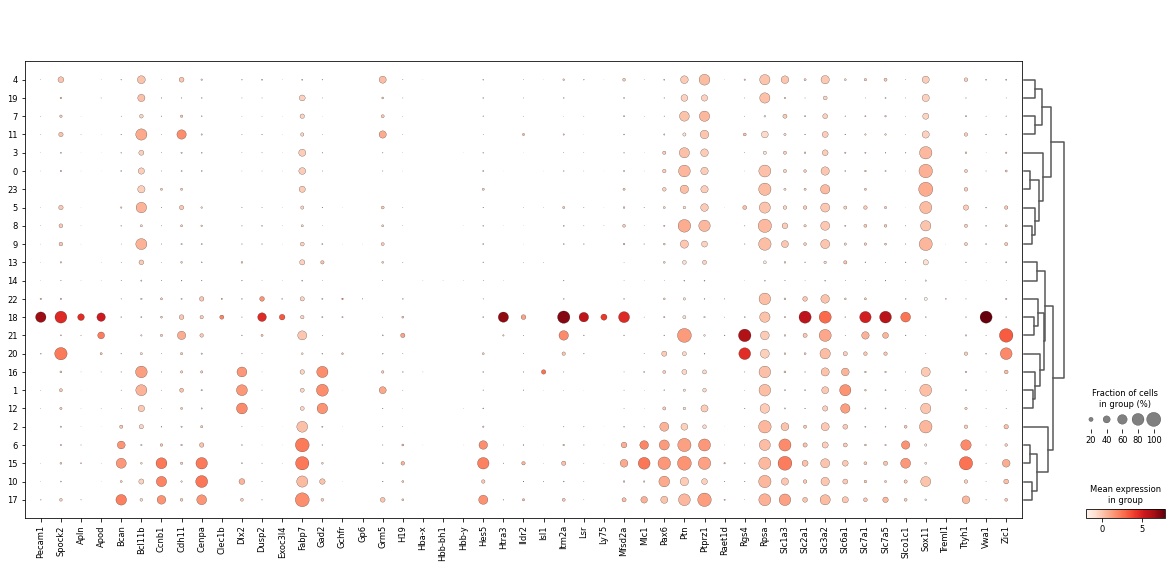

In [26]:
# Identify mature endothelial cells
sc.pl.dotplot(adata, ['Pecam1','Spock2','Apln','Apod',
                                             'Bcan','Bcl11b','Ccnb1','Cdh11','Cenpa',
                                             'Clec1b', 'Dlx2','Dusp2', 'Exoc3l4', 'Fabp7','Gad2',
                                             'Gchfr','Gp6','Grm5','H19','Hba-x','Hbb-bh1','Hbb-y',
                                             'Hes5','Htra3','Ildr2','Isl1','Itm2a','Lsr','Ly75',
                                             'Mfsd2a','Mlc1','Pax6','Ptn','Ptprz1','Raet1d','Rgs4',
                                             'Rpsa','Slc1a3','Slc2a1','Slc3a2','Slc6a1','Slc7a1',
                                             'Slc7a5','Slco1c1','Sox11','Treml1','Ttyh1','Vwa1','Zic1'], 'leiden', dendrogram=True)

From the above dotplot, it is likely that group 18 is mature endothelial cells. They are enriched highly across almost all marker genes.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


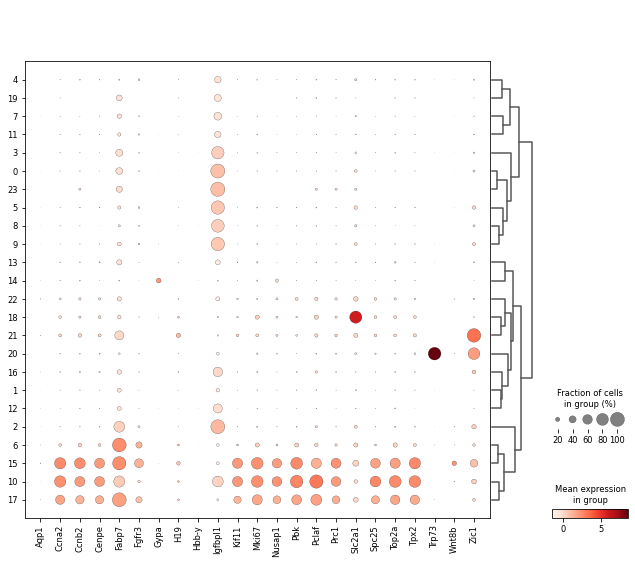

In [30]:
# Identify choroid plexus progenitor cells
sc.pl.dotplot(adata,['Aqp1','Ccna2','Ccnb2','Cenpe','Fabp7',
                                                   'Fgfr3','Gypa','H19','Hbb-y','Igfbpl1',
                                                   'Kif11','Mki67','Nusap1','Pbk','Pclaf',
                                                   'Prc1','Slc2a1','Spc25','Top2a','Tpx2',
                                                   'Trp73','Wnt8b','Zic1'], 'leiden', dendrogram=True)

Groups 15, 10, 17 could be choroid plexus progenitor cells. 

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


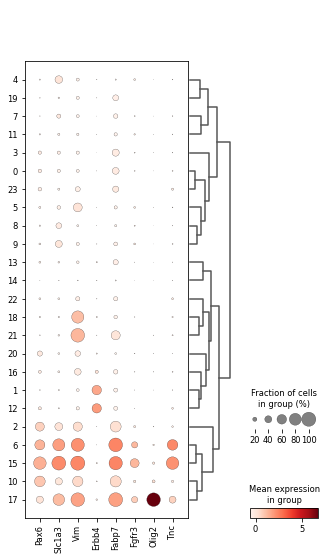

In [31]:
# Radial glia cells
sc.pl.dotplot(adata, ['Pax6','Slc1a3','Vim','Erbb4','Fabp7','Fgfr3','Olig2','Tnc'], 'leiden', dendrogram=True)

From the dotplot, 6 and 15 could be radial glia cells. These cells also produce astrocytes and oligodendrocytes, so they are types of radial glia but can be further classified (as above). Group 10 is related to 17 by the dendrogram, so they could be a type of oligodendrocyte, but it may be better to broadly classify as radial glia cells.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


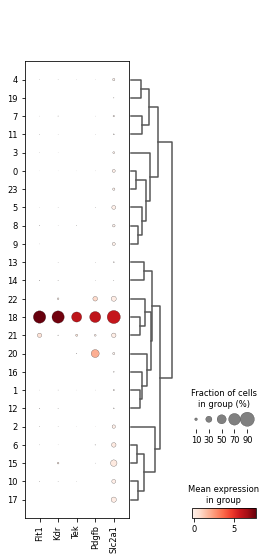

In [32]:
# Identify angioblasts
sc.pl.dotplot(adata, ['Flt1','Kdr','Tek','Pdgfb','Slc2a1'],'leiden',dendrogram=True)

Group 18 are angioblasts, which are a type of endothelial cell precursor (i.e. why they showed up as endothelial cells too)

categories: 0, 1, 2, etc.
var_group_labels: Angioblasts, Mature endothelial cells


/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


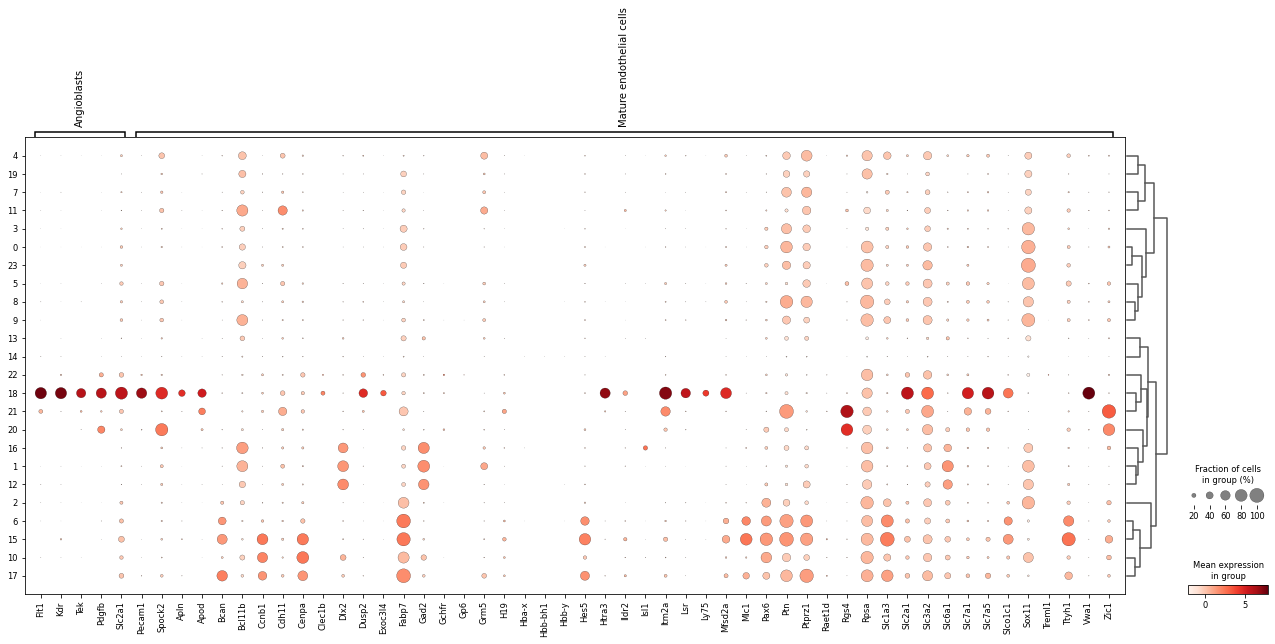

In [33]:
# Compare angioblasts and mature endothelial cells since they are both group 18
end_angio = {'Angioblasts':['Flt1','Kdr','Tek','Pdgfb','Slc2a1'],
            'Mature endothelial cells':['Pecam1','Spock2','Apln','Apod',
                                             'Bcan','Bcl11b','Ccnb1','Cdh11','Cenpa',
                                             'Clec1b', 'Dlx2','Dusp2', 'Exoc3l4', 'Fabp7','Gad2',
                                             'Gchfr','Gp6','Grm5','H19','Hba-x','Hbb-bh1','Hbb-y',
                                             'Hes5','Htra3','Ildr2','Isl1','Itm2a','Lsr','Ly75',
                                             'Mfsd2a','Mlc1','Pax6','Ptn','Ptprz1','Raet1d','Rgs4',
                                             'Rpsa','Slc1a3','Slc2a1','Slc3a2','Slc6a1','Slc7a1',
                                             'Slc7a5','Slco1c1','Sox11','Treml1','Ttyh1','Vwa1','Zic1']}
sc.pl.dotplot(adata, end_angio, 'leiden',dendrogram=True)

It is difficult to classify them as either, but it seems more likely that group 18 are angioblasts, or endothelial cell precursors.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


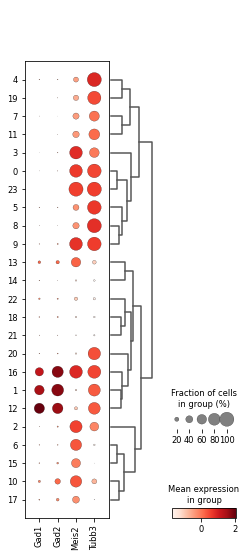

In [35]:
# GABA neurons
sc.pl.dotplot(adata, ['Gad1','Gad2','Meis2','Tubb3'], 'leiden', dendrogram=True)

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


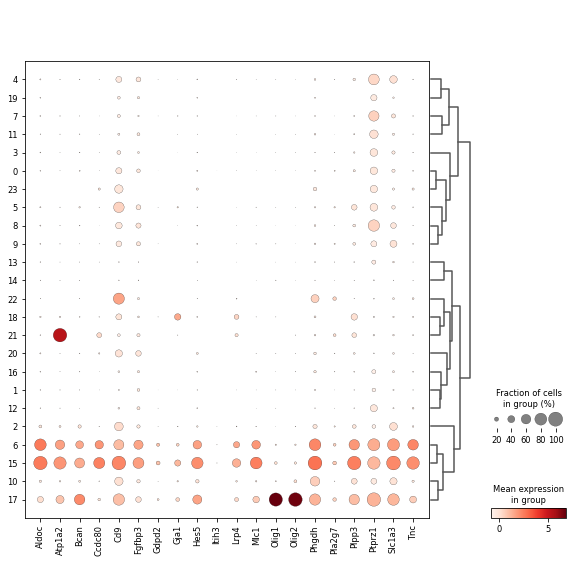

In [36]:
# Astrocytes
sc.pl.dotplot(adata, ['Aldoc','Atp1a2','Bcan','Ccdc80','Cd9','Fgfbp3','Gdpd2',
                              'Gja1','Hes5','Itih3','Lrp4','Mlc1','Olig1','Olig2',
                              'Phgdh','Pla2g7','Plpp3','Ptprz1','Slc1a3',
                              'Tnc'], 'leiden', dendrogram=True)

This reinforces that 6 and 15 are astrocytes.

/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/Users/samanthagoetting/opt/anaconda3/envs/scanpy-v2/lib/python3.6/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


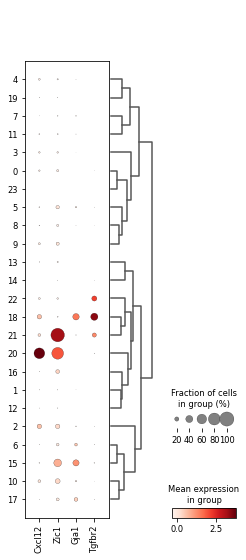

In [39]:
# Meningeal cells
sc.pl.dotplot(adata, ['Cxcl12','Zic1','Gja1','Tgfbr2'], 'leiden', dendrogram=True)

Hard to conclude from this. Group 20, 21, or both *could* be meningeal cells. Previous gene markers identified 21 as meningeal, so this is reinforced here.

## Step 4: Cell types plots

In [53]:
# create dictionary to map cluster to annotation level
cluster2annotation = {
    '0': 'Neurons',
    '1': 'Neurons',
    '2': 'Neurons',
    '3': 'Neurons',
    '4': 'Neurons',
    '5': 'Neurons',
    '6': 'Astrocytes',
    '7': 'Neurons',
    '8': 'Pericytes',
    '9': 'Neurons',
    '10': 'Radial glia cells',
    '11': 'Neurons',
    '12': 'Neurons',
    '13': 'Neurons',
    '14': 'Neurons',
    '15': 'Astrocytes',
    '16': 'Neurons',
    '17': 'Oligodendrocytes',
    '18': 'Angioblasts/endothelial precursors',
    '19': 'Neurons',
    '20': 'Cajal-Retzius cells',
    '21': 'Meningeal cells',
    '22': 'Microglia',
    '23': 'Neurons'
}

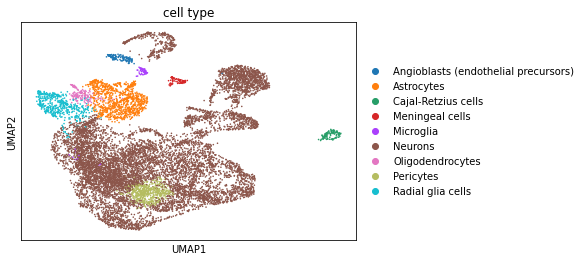

In [56]:
# Now, color UMAP based on cell type
adata.obs['cell type'] = adata.obs['leiden'].map(cluster2annotation).astype('category')
sc.pl.umap(adata, color='cell type')

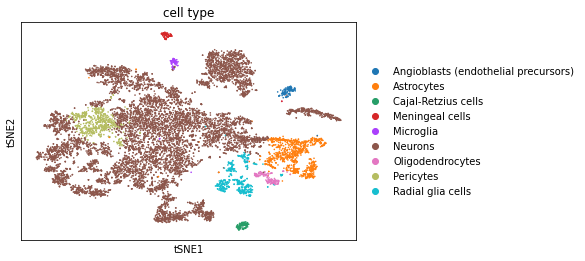

In [57]:
# Color TSNE based on cell type
sc.pl.tsne(adata, color='cell type')

The tSNE2 plot appears more aligned with the dendrogram. For example, radial glia cells, oligodendrocytes, and astrocytes are related, which were all broadly classified as radial glia cells.